# MNIST Neural Network Implementation

In [1]:
from tensorflow.keras.datasets import mnist
import os, matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
from utils import *

2025-02-28 13:43:56.652851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Generate Pickle File from Tensorflow library

In [2]:
import pickle

# Load MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Create a dictionary with all the data
mnist_data = {
    'train_X': train_X,
    'train_y': train_y,
    'test_X': test_X,
    'test_y': test_y
}

# Save as pickle file
with open('datasets/mnist.pickle', 'wb') as f:
    pickle.dump(mnist_data, f)

print("MNIST data saved as mnist.pickle")

MNIST data saved as mnist.pickle


## Load the MNIST dataset

In [3]:
def load_data():
    (train_X, train_y), (test_X, test_y) = mnist.load_data()
    
    return (train_X, train_y), (test_X, test_y)
    
def get_data():
    (train_X, train_y), (test_X, test_y) = load_data()
    
    # Flatten the images (reshape from 28x28 to 784 features)
    train_X_flat = train_X.reshape(train_X.shape[0], -1)
    test_X_flat = test_X.reshape(test_X.shape[0], -1)
    
    # Normalize pixel values to range [0, 1]
    train_X_normalized = train_X_flat / 255.0
    test_X_normalized = test_X_flat / 255.0

    # print(train_X_normalized.shape)
    # print(train_y.shape)
    # print(test_X_normalized.shape)
    # print(test_y.shape)
    
    return test_X_normalized, test_y
    
def init_network():
    with open('datasets/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

In [4]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2) 
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

Label: 5
Original shape: (28, 28)
Reshaped to: (28, 28)


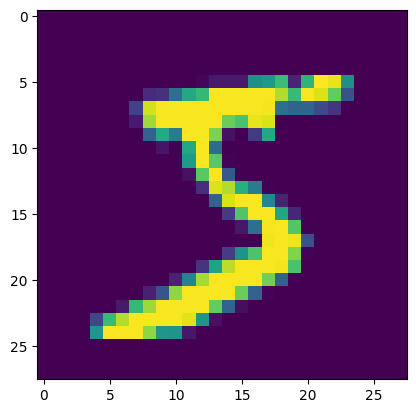

In [5]:
def img_show(img):
    # Scale back to 0-255 range for display 
    img_255 = (img * 255).astype(np.uint8)
    pil_img = Image.fromarray(img_255)
    plt.imshow(img)
    plt.show()

# Get a sample
(train_X, train_y), (test_X, test_y) = load_data()
img = train_X[0]
label = train_y[0]
print(f"Label: {label}")

print(f"Original shape: {img.shape}")
img = img.reshape(28, 28)
print(f"Reshaped to: {img.shape}")

img_show(img)

## Accuracy Computation

In [6]:
test_X, test_y = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(test_X)):
    y = predict(network, test_X[i])
    p = np.argmax(y)
    if p == test_y[i]:
        accuracy_cnt += 1
print("Accuracy:" + str(float(accuracy_cnt) / len(test_X)))

Accuracy:0.9352


## Batch Computation

In [7]:
# The dimension of the data
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [12]:
test_x, test_y = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
for i in range(0, len(test_x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == test_y[i:i+batch_size])
print("Accuracy:" + str(float(accuracy_cnt) / len(test_X)))

Accuracy:0.9352


## Sample NN implementation

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = "9.png"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis("off")
plt.show()

# Preprocessing: Resize, Invert, Normalize
img = cv2.resize(img, (28, 28))
img = cv2.bitwise_not(img)  # Invert colors if needed
img = img / 255.0  # Normalize

# Display the processed image
plt.imshow(img, cmap='gray')
plt.title("Processed Image")
plt.axis("off")
plt.show()

# Reshape for model input
img = img.reshape(1, 28, 28)  # Model expects (1, 28, 28)
img.shape


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import os

def initialize_cnn(input_shape=(28, 28, 1)):
    np.random.seed(42)
    
    # Calculate feature map sizes
    conv1_output = (input_shape[0] - 3 + 1, input_shape[1] - 3 + 1, 32)
    pool1_output = (conv1_output[0] // 2, conv1_output[1] // 2, 32)
    conv2_output = (pool1_output[0] - 3 + 1, pool1_output[1] - 3 + 1, 64)
    pool2_output = (conv2_output[0] // 2, conv2_output[1] // 2, 64)
    flattened_size = pool2_output[0] * pool2_output[1] * pool2_output[2]
    
    params = {
        "W1": np.random.randn(3, 3, 1, 32) * 0.01,
        "b1": np.zeros((1, 1, 1, 32)),
        "W2": np.random.randn(3, 3, 32, 64) * 0.01,
        "b2": np.zeros((1, 1, 1, 64)),
        "W3": np.random.randn(flattened_size, 128) * 0.01,
        "b3": np.zeros((1, 128)),
        "W4": np.random.randn(128, 10) * 0.01,
        "b4": np.zeros((1, 10)),
    }
    return params

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

def convolve(X, W, b):
    batch_size, height, width, channels = X.shape
    f_height, f_width, in_channels, out_channels = W.shape
    out_height = height - f_height + 1
    out_width = width - f_width + 1
    Z = np.zeros((batch_size, out_height, out_width, out_channels))
    
    for i in range(out_height):
        for j in range(out_width):
            region = X[:, i:i+f_height, j:j+f_width, :]  # Shape: (batch_size, f_height, f_width, in_channels)
            # Reshape region to match W for proper broadcasting
            region_reshaped = region.reshape(batch_size, f_height, f_width, in_channels, 1)
            W_reshaped = W.reshape(1, f_height, f_width, in_channels, out_channels)
            # Multiply and sum the appropriate dimensions
            Z[:, i, j, :] = np.sum(region_reshaped * W_reshaped, axis=(1, 2, 3)).reshape(batch_size, out_channels) + b
    
    return Z

def max_pool(X, size=2, stride=2):
    batch_size, height, width, channels = X.shape
    out_height = (height - size) // stride + 1
    out_width = (width - size) // stride + 1
    pooled = np.zeros((batch_size, out_height, out_width, channels))
    
    for i in range(out_height):
        for j in range(out_width):
            region = X[:, i*stride:i*stride+size, j*stride:j*stride+size, :]
            pooled[:, i, j, :] = np.max(region, axis=(1, 2))
    
    return pooled

def compute_loss(Y_pred, Y_true):
    m = Y_true.shape[0]
    return -np.sum(Y_true * np.log(Y_pred + 1e-8)) / m

def forward_propagation(X, params):
    X = X.reshape(-1, 28, 28, 1)
    Z1 = convolve(X, params["W1"], params["b1"])
    A1 = relu(Z1)
    P1 = max_pool(A1)
    Z2 = convolve(P1, params["W2"], params["b2"])
    A2 = relu(Z2)
    P2 = max_pool(A2)
    
    F = P2.reshape(P2.shape[0], -1)
    Z3 = np.dot(F, params["W3"]) + params["b3"]
    A3 = relu(Z3)
    Z4 = np.dot(A3, params["W4"]) + params["b4"]
    A4 = softmax(Z4)
    
    cache = {"A1": A1, "P1": P1, "A2": A2, "P2": P2, "A3": A3, "A4": A4, "F": F}
    return A4, cache

def backward_propagation(X, Y, params, cache):
    m = X.shape[0]
    X = X.reshape(-1, 28, 28, 1)
    A1, P1, A2, P2, A3, A4, F = cache["A1"], cache["P1"], cache["A2"], cache["P2"], cache["A3"], cache["A4"], cache["F"]
    
    # Gradients for output layer
    dZ4 = A4 - Y
    dW4 = np.dot(A3.T, dZ4) / m
    db4 = np.sum(dZ4, axis=0, keepdims=True) / m
    
    # Gradients for hidden fully connected layer
    dA3 = np.dot(dZ4, params["W4"].T)
    dZ3 = dA3 * relu_derivative(A3)
    dW3 = np.dot(F.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    # For this simplified implementation, we won't backpropagate through
    # the convolutional layers as it's computationally intensive
    # In a complete implementation, you would compute dW1, db1, dW2, db2 here
    
    gradients = {"dW3": dW3, "db3": db3, "dW4": dW4, "db4": db4}
    return gradients

def update_parameters(params, gradients, learning_rate):
    for key in gradients.keys():
        param_key = key[1:]  # Remove the 'd' prefix to get the parameter key
        params[param_key] -= learning_rate * gradients[key]
    return params

def train_cnn(X, Y, params, learning_rate=0.01, epochs=10):
    m = X.shape[0]
    Y_one_hot = np.eye(10)[Y]
    
    for epoch in range(epochs):
        Y_pred, cache = forward_propagation(X, params)
        loss = compute_loss(Y_pred, Y_one_hot)
        gradients = backward_propagation(X, Y_one_hot, params, cache)
        
        # Only update parameters we have gradients for
        params["W3"] -= learning_rate * gradients["dW3"]
        params["b3"] -= learning_rate * gradients["db3"]
        params["W4"] -= learning_rate * gradients["dW4"]
        params["b4"] -= learning_rate * gradients["db4"]
        
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}")

def preprocess_image(image_path):
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"File not found: {image_path}")
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError("Failed to load image. Check file format and path.")
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X / 255.0
test_X = test_X / 255.0

params = initialize_cnn()
train_cnn(train_X[:1000], train_y[:1000], params, epochs=10)

def predict_image(image_path, params):
    try:
        img = preprocess_image(image_path)
        prediction, _ = forward_propagation(img, params)
        return np.argmax(prediction, axis=1)[0]
    except Exception as e:
        return f"Error: {str(e)}"

# Example usage
image_path = '4.png'  # Change to the uploaded image path
predicted_number = predict_image(image_path, params)
print(f'Predicted number: {predicted_number}')


In [ ]:
image_path = '9.png'  # Change to the uploaded image path
predicted_number = predict_image(image_path, params)
print(f'Predicted number: {predicted_number}')